In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import csv
import pandas as pd
import numpy as np
import os

In [8]:
#Utility for binning
def rrange(start,stop,step=1):
    vals=[]
    while start<=stop:
        vals.append(start)
        start+=step
    return vals

In [9]:
#Gets a dataframe that can be used with the cali_chart_graph function
#input is the file with the softmax and correct values, which should be labeled in file
def cali_chart_df_prep(filename):
    df = pd.read_csv(filename)
    df['bin']=pd.cut(df['softmax'],np.linspace(0,1,int(1/0.05)+1),include_lowest=False)
    df=df.drop('softmax',axis='columns')
    df=df.groupby('bin').mean().reset_index()
    df['x']=rrange(0,1,0.05)
    df.rename(columns={'correct':'y'},inplace=True)
    return df

In [10]:
def cali_chart_graph(df, ax):
    df.plot.bar('x','y',ax=ax,legend=False)
    ax.set_xticklabels(df.bin)
    ax.plot([0,20],[0,1],'k--')
    ax.set_xlabel('Bins')
    ax.set_ylabel('Accuracy')

In [11]:
#Specific to a user's needs, may need to change depending on your needs
def graph_main(directory):
    fig = plt.figure(figsize=(8,9.4))
    for i_ax, ev in enumerate(['test','train']):
        #Prep the dataframe for ploting
        df = cali_chart_df_prep(directory+f'/cali_{ev}.csv')
       

        #Plot and plot options
        ax=fig.add_subplot(2,2,i_ax+1)
        cali_chart_graph(df, ax)
        ax.set_title(ev.capitalize())
    fig.tight_layout()

In [29]:
np.linspace(0,1,int(1/0.05)+1)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [77]:
#Builds a df with all the columns for ece, including 'ece_comp' which has the values
def get_nums(filename):
    df = pd.read_csv(filename)
    df=df.round(3)
    df['bin']=pd.cut(df['softmax'],np.linspace(0,1.05,int(1.05/0.05)+1),include_lowest=False,right=False)
    df_a=df.groupby('bin').mean().reset_index()
    df_b=df[['bin']].groupby('bin').size().rename('count').reset_index()
    df=df_a.merge(df_b,on='bin')
    df['x']=rrange(0.025,1.075,0.05)
    df['n']=sum(df['count'])
    df.rename(columns={'correct':'y'},inplace=True)
    df['ece_comp']=df.apply(lambda r : (r['count']/r['n'])*abs(r['y']-r['softmax']),axis=1)
    return df

In [78]:
#----------------------------------------------------
#Add what you want to do with these functions here...

In [79]:
get_nums('./production_cali_cf100/theirs/run1/cali_test.csv')


,bin,y,softmax,count,x,n,ece_comp
0,"[0.0, 0.05)",NaN,NaN,0,0.025,10000,NaN
1,"[0.05, 0.1)",0.000000,0.082000,3,0.075,10000,0.000025
2,"[0.1, 0.15)",0.128205,0.130769,39,0.125,10000,0.000010
3,"[0.15, 0.2)",0.137405,0.177702,131,0.175,10000,0.000528
4,"[0.2, 0.25)",0.146226,0.225967,212,0.225,10000,0.001691
5,"[0.25, 0.3)",0.270175,0.276116,285,0.275,10000,0.000169
6,"[0.3, 0.35)",0.250765,0.325896,327,0.325,10000,0.002457
7,"[0.35, 0.4)",0.261538,0.375818,325,0.375,10000,0.003714
8,"[0.4, 0.45)",0.375610,0.424161,410,0.425,10000,0.001991
9,"[0.45, 0.5)",0.376068,0.475004,468,0.475,10000,0.004630


In [80]:
def gettitle(exp,ev):
    if exp=='theirs':
        return f'SGLD for {ev} data'
    if exp=='ours':
        return f'Energy variance for {ev} data'
    if exp=='baseline':
        return f'Baseline X-entropy for {ev} data'
    return ""

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9186: FutureWarning: Passing 'suffixes' which cause duplicate columns {'y_10', 'softmax_10', 'count_10', 'ece_comp_10', 'n_10'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


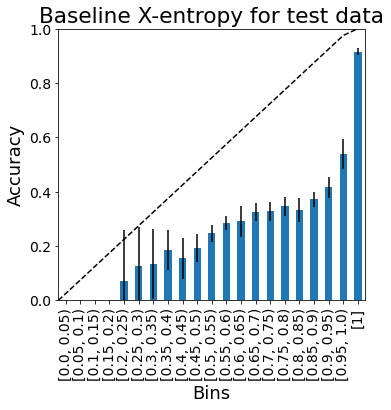

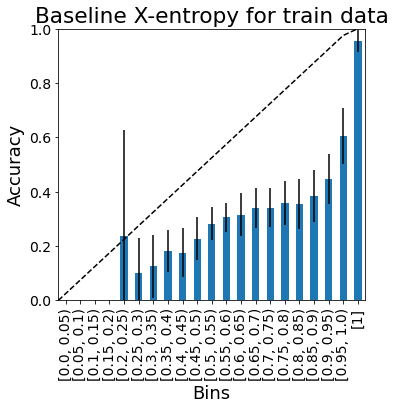

In [137]:
eces_t=[]
df = None
#ev='test'
for exp in ['baseline']:
    for ev in ['test','train']:
        for a in [1,2,3,4,5,6,7,8,9,11]:
            if exp=='theirs' or exp == 'baseline':
                run = 'run'
            else:
                run = 'cvrlrun'
            tdf=get_nums(f'./production_cali_cf100/{exp}/{run}{str(a)}/cali_{ev}.csv')
            eces_t.append(tdf['ece_comp'].sum())
            if df is None:
                df = tdf
            else:
                df = df.merge(tdf,on=('bin','x'),suffixes=('_'+str(a-1),'_'+str(a)))
        ys=[i for i in df.columns if i[0]=='y']
        df['mean']=df[ys].mean(axis=1)
        df['sd']=df[ys].std(axis=1)

        yline=rrange(-0.025,1.075,0.05)
        yline[0]=0
        yline[21]=1
        xline=rrange(-1,20,1)
        xline[0]=-.5
        binl=['[0.0, 0.05)','[0.05, 0.1)','[0.1, 0.15)','[0.15, 0.2)','[0.2, 0.25)','[0.25, 0.3)','[0.3, 0.35)','[0.35, 0.4)','[0.4, 0.45)','[0.45, 0.5)','[0.5, 0.55)','[0.55, 0.6)','[0.6, 0.65)','[0.65, 0.7)','[0.7, 0.75)','[0.75, 0.8)','[0.8, 0.85)','[0.85, 0.9)','[0.9, 0.95)','[0.95, 1.0)','[1]']
        fig = plt.figure(figsize=(5.5,5))
        plt.rcParams.update({'font.size': 18})
        plt.rc('xtick', labelsize=14) 
        plt.rc('ytick', labelsize=14) 
        ax=plt.gca()
        df.plot.bar('x','mean',ax=ax,legend=False,yerr='sd')
        ax.set_xticklabels(binl)
        ax.plot(xline,yline,'k--')
        #ax.plot(rrange(0.5,20.5,1),rrange(0,1.05,.05),'k--')
        #ax.plot(xline,rrange(0.0,1.10,.05),'r--')
        ax.set_ylim([0,1])
        ax.set_xlim([-.5,20.5])
        ax.set_xlabel('Bins')
        ax.set_ylabel('Accuracy')
        ax.set_title(gettitle(exp,ev))


In [12]:
df['mean'].sum()

9.190324076936015

In [104]:
xline=rrange(-1,20,1)
xline[0]=-.5
len(xline)

22

In [105]:
yline=rrange(-0.025,1.075,0.05)
yline[0]=0
yline[21]=1
len(yline)

22

In [129]:
rrange(0,1.05,.05)

[0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.6,
 0.65,
 0.7000000000000001,
 0.7500000000000001,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000002]

Text(0.5, 1.0, 'New study calibration')

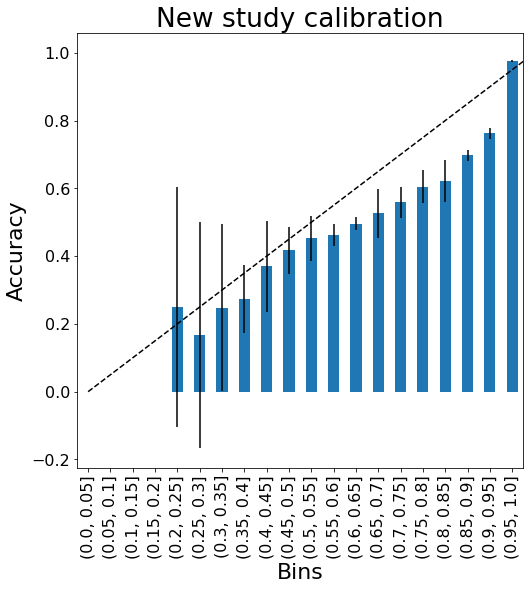

In [15]:
eces_o=[]
df = None
ev='test'
for a in range(1,6):
    tdf=get_nums('./production/ours'+str(a)+'/cali_test.csv')
    eces_o.append(tdf['ece_comp'].sum())
    if df is None:
        df = tdf
    else:
        df = df.merge(tdf,on=('bin','x'),suffixes=('_'+str(a-1),'_'+str(a)))
ys=[i for i in df.columns if i[0]=='y']
df['mean']=df[ys].mean(axis=1)
df['sd']=df[ys].std(axis=1)


fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
ax=plt.gca()
df.plot.bar('x','mean',ax=ax,legend=False,yerr='sd')
ax.set_xticklabels(df.bin)
ax.plot([0,20],[0,1],'k--')
ax.set_ylim([0,1])
ax.set_xlabel('Bins')
ax.set_ylabel('Accuracy')
ax.set_title("New study calibration")

In [12]:
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import fdrcorrection

In [236]:
#import sys
#!{sys.executable}  -m pip install statsmodels

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 9.9 MB 7.2 kB/s eta 0:00:01
     |████████████████████████████████| 233 kB 112.9 MB/s eta 0:00:01


In [186]:
wilcoxon(eces_t,eces_o)

WilcoxonResult(statistic=6.0, pvalue=0.8125)

In [16]:
ms=[np.mean(eces_t),np.mean(eces_o)]
stds=[np.std(eces_t),np.std(eces_o)]

In [17]:
ms

[0.03601633931994437, 0.03713363867044446]

Text(0.5, 1.0, 'ECE comparison')

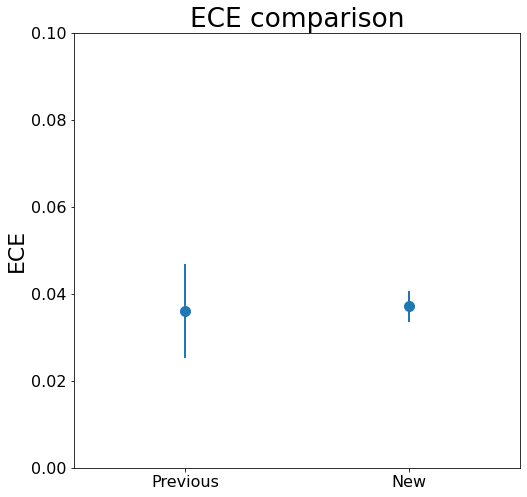

In [220]:
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
ax=plt.gca()
ax.scatter([0,1],ms,s=100)
ax.errorbar([0,1],ms,yerr=stds,fmt='none',elinewidth=2)
ax.set_ylim([0,.1])
ax.set_xlim([-.5,1.5])
ax.set_ylabel('ECE')
ax.set_xticks([0,1])
ax.set_xticklabels(['Previous','New'])
ax.set_title("ECE comparison")

In [8]:
tpxg = [0.6479335855869699,0.6891187442378611,0.7267265192839583,0.6990380838967425,0.4763362380915795]
opxg = [0.8865400411032576,0.792745586201598,0.8159975280424094,0.8264703576367549,0.8044875864320836]
tpy  = [0.8921300303472648,0.8625806180854332,0.8900458166871543,0.8965590388752305,0.7531804567455439]
opy  = [0.9055193838352796,0.9049090254302397,0.8956089658881378,0.8656058793023971,0.8830804797940996]

In [14]:
tpxg = [0.7323936501229257,0.7325102201137061,0.5550168043177628, \
        0.6775620371081745,0.7326802147357099,0.7663783766133989, \
        0.05409866318377382,0.15068139405347264,0.7232798037031346, \
        0.7201956226951445,0.7007386312999386,0.7571406518899816]
opxg = [0.8452818761524277,0.8729070759065765,0.8822532863398893, \
        0.886712444299324,0.8861011428242164,0.8695366779348493, \
        0.8314708224492932,0.8812382951751689,0.8847503015519361, \
        0.8887251037185003,0.8793465119852488,0.8725308428088507]
bpxg = [0.030525412953288263,0.031696237323294414,0.08207852066687155, \
       0.03274180239704978,0.09539938345113708,0.04004191571911494, \
       0.08848035302704364,0.053582091272280266,0.08961529847879533, \
       0.0382797057467732,0.03322507106637984,0.04814673670866626]
tpy  = []
opy  = []
bpy  = []

In [13]:
np.mean(opy)

0.8909447468500307

----


(array([False,  True,  True, False, False,  True]),
 array([1.00000000e+00, 7.32421875e-04, 9.76562500e-04, 1.00000000e+00,
        1.00000000e+00, 7.32421875e-04]))

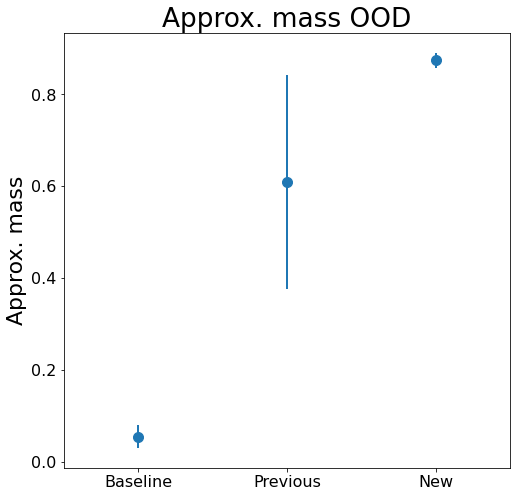

In [21]:
ms   = [np.mean(bpxg),np.mean(tpxg),np.mean(opxg)]
stds = [np.std(bpxg),np.std(tpxg),np.std(opxg)]

fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
ax=plt.gca()
ax.scatter([0,1,2],ms,s=100)
ax.errorbar([0,1,2],ms,yerr=stds,fmt='none',elinewidth=2)
#ax.set_ylim([0,.1])
ax.set_xlim([-.5,2.5])
ax.set_ylabel('Approx. mass')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Baseline','Previous','New'])
ax.set_title("Approx. mass OOD")

p_pxg=[wilcoxon(tpxg,opxg,alternative='greater')[1],wilcoxon(opxg,tpxg,alternative='greater')[1],
      wilcoxon(tpxg,bpxg,alternative='greater')[1],wilcoxon(bpxg,tpxg,alternative='greater')[1],
      wilcoxon(bpxg,opxg,alternative='greater')[1],wilcoxon(opxg,bpxg,alternative='greater')[1]]
print('----')
fdrcorrection(p_pxg)

(array([False, False]), array([0.15625, 0.15625]))

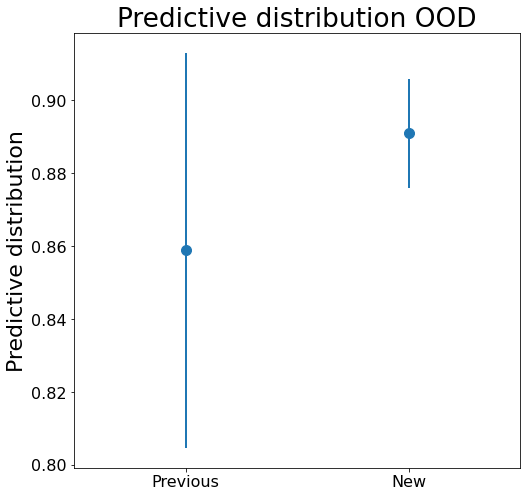

In [11]:
ms   = [np.mean(tpy),np.mean(opy)]
stds = [np.std(tpy),np.std(opy)]

fig = plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
ax=plt.gca()
ax.scatter([0,1],ms,s=100)
ax.errorbar([0,1],ms,yerr=stds,fmt='none',elinewidth=2)
#ax.set_ylim([0,.1])
ax.set_xlim([-.5,1.5])
ax.set_ylabel('Predictive distribution')
ax.set_xticks([0,1])
ax.set_xticklabels(['Previous','New'])
ax.set_title("Predictive distribution OOD")

p_pxg=[wilcoxon(tpy,opy,alternative='less')[1],wilcoxon(tpy,opy,alternative='less')[1]]
fdrcorrection(p_pxg)